In [1551]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import requests
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from random import randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns# 
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn import tree

# Power Outages and Fire Size Predictions

Riccardo Conte:

Habib Djaroueh: Habib worked on acquiring the weather dataset using the OpenWeatherAPI and the data cleaning of the utilities power outages dataset. Habib merged the datasets together. Habib performed EDA in order to see patterns in the dataset, like the number of null values that exist for each column. Habib did feature engineering to prepare the data for modeling, he ended up running 6 models, namely: DecisionTreeClassifier, BaggingClassifier, RandomForestClassifier,
RandomizedSearchCV, GradientBoostingClassifier, and Logistic Regression. Ended up with an 87.6% accuracy with the RandomForestClassifier. Habib estimates he worked: around 50 hours on this project.

Jack Rogers:


## Abstract (5 points)
Although this section comes first, you'll write it last.  It should be a ~250 word summary of your project.  1/3rd of the abstract should provide background, 1/3rd should explain what you did, and 1/3rd should explain what you learned.

In this research project, we analyzed California utilities fire and power outage data from all major utilities, over the years 2014-2023, to discover any correlations among a large number of features to predict and prepare for the event of a power outage and an outage-related fire. We used a number of predictive model approaches based on the type of model and the datasets. We used random forest, gradient boosting, bagging, decision tree, randomized search, and logistic regression to create our blackout model. The most accurate model out of them was the random forest approach which resulted with an 87.7% testing accuracy, and an optimal classification report. Upon inspecting the results, we found that dew point (unit: Kelvin, feature importance (FI) = 100%) was most heavily correlated to predicting a power outage, followed by “feels like” temperature (unit: Kelvin, FI=96.11%), and temperature (unit: Kelvin, FI=91.34%), humidity (unit: %, FI=89.12%), and wind direction (unit: degrees, FI=83.65%). The second predictive model used random forest regression, support vector machine (SVM), and K-nearest neighbor (KNN) to predict the size of a wildfire caused by an accidental ignition. This model was also most accurately predicted by random foresting with a testing accuracy of 81.9%. Due to the nature of the wildfire data, we noticed an imbalance distribution among the fire size categories, as most of the observations represent wildfires under one acre in size. We presume this data characteristic had an significant impact on the performance of our prediction models. The features found to be most heavily correlated with fire size prediction were dew point (unit: Kelvin, FI=89.83%), “feels like” temperature (unit: Kelvin, FI=88.22%), temperature (unit: Kelvin, PI=87.68%), and wind direction (unit: degrees, FI=82.53%). We learned that dew point is the most prevalent indicator for not only whether or not a blackout is going to occur, but also the size that a fire will spread to. We also correctly expected that temperature and wind conditions have strong correlations to both of these outcomes as well.

## Project Background (5 points)
In this section you will describe relevant background for your project.  It should give enough information that a non-expert can understand in detail the history and / or context of the system or setting you wish to study, the need for quantitative analysis, and, broadly, what impact a quantitative analyses could have on the system.  Shoot for 500 words here.

For the past century, especially in the past twenty five years of the 21st century, American culture has placed climate change on the podium of challenges that it has chosen to address – putting it at the forefront of the global sphere in climate tech innovation. Within this sphere, California has been the leader in American politics, pushing for greater government spending and incentives than all other states. One of the main areas touched in the cleaning of the energy portfolio as well as expanding and increasing the resiliency of energy infrastructure throughout the state. To this end, California has three major energy utilities – Pacific Gas & Electric (PG&E), Southern California Edison (SCE), and San Diego Gas and Electric (SDGE) – that are all looking for the most efficient ways to allocate their resources and get the cleanest and most reliable energy system that they can with the resources available.
An inherent problem with the current infrastructure is the rampant spread of wildfires that has plagued California for the past few decades. This costs the state tens of billions of dollars if not more to repair homes, businesses, and land damaged by these natural disasters. Not to mention, the blackouts that often come with these fires can lead to serious detriments to quality of life in service areas, even threatening lives in some instances. Whether the cause is extreme weather events, overgrown trees, or dry seasons, these companies are constantly looking for ways to mitigate not only the damage but also the maintenance efforts that they have to put in as a result of these trends.
In fact, California as a whole has a market size of around $3 billion per year just on wildfire mitigation alone. Add that to the roughly $22 billion spent on infrastructure hardening and upgrading from 2020 to 2022 and it is clear to see that the demand is there for answers on where to spend the next dollar in the budget for the most effect (Lazo).
One solution to this resource allocation problem is quantitative analysis. This solution provides a unique opportunity to look at physical data and from the outputs determine the best way to solve the problem. This method creates reproducible results that allow you to have an objective understanding of the most efficient way to address a situation that you have already seen before. On top of that, if allows for model computing that is able to learn from itself as it fails and succeeds. By optimizing itself over time, the wide scale adoption of a solution such as this would ensure a very reliable read out of things such as: areas that are susceptible to the next blackout, and areas susceptible to large scale wildfires based on a pre-set table of features that are collected.


      

## Project Objective (5 points)
In this section you will pose the central objective or objectives for your semester project.  Objectives should be extremely clear, well-defined and clearly cast as forecasting problems.  

Some example questions: 
1. *"The purpose of this project is to train and evaluate different models to predict soil heavy metal contamination levels across the state of Louisiana, using a variety of features drawn from EPA, the US Census, and NAICS databases."* or
2. *"The purpose of this project is to train and evaluate different models to predict 1-minute generation from a UCSD solar PV site, up to 2 hours into the future, using historical data as well as basic weather forecast variables.*" or
3. *"The purpose of this project is to forecast daily emergency room visits for cardiac problems in 4 major US cities, using a majority of features including air quality forecasts, weather forecasts and seasonal variables."*

You should reflect here on why it's important to answer these questions.  In most cases this will mean that you'll frame the answers to your questions as informing one or more *resource allocation* problems.  If you have done a good job of providing project background (in the cell above) then this reflection will be short and easy to write.

**Comment on novelty:** You may find it hard to identify a project question that has *never* been answered before.  It's ok if you take inspiration from existing analyses.  However you shouldn't exactly reproduce someone else's analysis.  If you take inspiration from another analyses, you should still use different models, different data, and so on.


The purpose of this project is to train and evaluate various predictive models to forecast power outages in California, particularly focusing on those potentially initiated by wildfires. Additionally, the project aims to develop a complementary model to predict the size and spread of wildfires based on historical data and environmental factors.
These objectives hold significant importance for multiple reasons. First, by improving the ability to predict power outages, utility companies can better prepare for and mitigate service interruptions, reducing their impact on communities. Second, forecasting the size of wildfires can enhance emergency response planning, enabling first responders to allocate personnel and equipment to areas at greatest risk. Together, these models can inform decision-making for proactive safety measures such as Public Safety Power Shutoffs (PSPS), evacuation orders, and resource pre-positioning.
The broader implications of this work include increased public safety, as faster and more accurate predictions reduce the risk to human life and property. Furthermore, enhanced resource allocation saves money, labor, and time for utilities and emergency management organizations. These savings can be redirected to strengthen infrastructure and improve community preparedness. From a policy perspective, insights gained through this analysis can help prioritize investments in fire prevention and grid resiliency measures, contributing to long-term solutions for California’s wildfire and energy challenges.
In essence, this project aims to combine machine learning techniques with real-world data to address critical societal needs, making communities safer and utilities more efficient.


## Input Data Description (5 points) (Not Done)
Here you will provide an initial description of your data sets, including:
1. The origins of your data.  Where did you get the data?  How were the data collected from the original sources?  You must provide enough information for the reader to be able to access the data themselves.  
2. The structure, granularity, scope, temporality and faithfulness (SGSTF) of your data.  To discuss these attributes you should load the data into one or more data frames (so you'll start building code cells for the first time).  At a minimum, use some basic methods (`.head`, `.loc`, and so on) to provide support for the descriptions you provide for SGSTF. 
3. You should also describe which data fields you will use as your target variables, and which you will use as features.

To accomplish the objectives of this project, we sourced data from multiple reputable sources, ensuring a comprehensive dataset to train and evaluate our predictive models. Below is an initial description of the datasets, including their origins, attributes, and intended roles:
1. Data Origins and Collection Methods
We sourced the fire incident data directly from the California Public Utilities Commission (CPUC) on wildfire safety. If you scroll down to “Fire Ignition Data”, you can find links to the data from these utilities: SDG&E, SCE, & PG&E. The original datasets were downloaded as annual excel workbooks, and then combined. The original datasets include detailed information about utility name, fire incident date, time, latitude and longitude, material at origin, land use at origin, size, presence of power outage, and more.
We also retrieved the weather data from OpenWeatherMap using this link: https://api.openweathermap.org/data/3.0/onecall/timemachine?lat={lat}&lon={lon}&dt={time}&appid={API key} and an API key (“c4f120b33c59fae75c8b731da1756e0e”) that is on the One Call API plan (free subscription APIs would not work here). Using the link above, and inputting Latitude (Latitude coordinate [degrees]), Longitude (Longitude coordinate [degrees]), datetime (Full timestamp of the incident), datetime_unix (Timestamp in Unix format [seconds]), and the API key into each {“”} section to retrieve weather data from that given data point. We automated this process to extract weather data with the proper scope and temporality, and created a dataset. This dataset provides detailed weather observations, including hourly and daily metrics like temperature, wind speed, humidity, and pressure. These factors play a critical role in understanding wildfire behavior and power grid vulnerability.
These datasets provide a well-rounded view of the problem, addressing both environmental and infrastructure-related dimensions of fire and power outage dynamics.

2. Data Structure, Granularity, Scope, Temporality, and Faithfulness (SGSTF)
Structure: The datasets include structured data fields that provide both temporal and spatial information alongside categorical descriptors. Key fields include: the exact date and time of fire events, which are critical for temporal analysis and matching with weather and power outage data; spatial coordinates pinpointing the location of fire origins, enabling geospatial analysis and integration with other location-based datasets; and categorical data such as material at origin, and land use at origin.
Granularity: The dataset includes fine-grained temporal details, such as the exact start date and time (down to the minute) of wildfires. This precision allows for a more accurate correlation between weather conditions, fire incidents, and power outages. Coupled with spatial data (latitude and longitude), this granularity enables the analysis to focus on localized patterns and immediate temporal trends, which are essential for predicting wildfire behavior and its impact on power grid infrastructure.
Scope: The focus is on California, encompassing its diverse ecosystems, wildfire-prone zones, and utility service areas.
Temporality: Datasets span at least the last decade (2014-2023) to capture trends and patterns in wildfire activity, weather variability, and grid performance.
Faithfulness: Each dataset has been vetted for accuracy, completeness, and relevance to ensure reliability and representativeness. They were obtained from an official governmental database and an open weather source.
3. Target Variables and Features
The target variable for the power outage model is a binary indicator of outages: "Outage" or "No Outage". The features for this model are: Material at Origin (Type of material involved at fire origin), Land Use at Origin (Type of land use where fire started, e.g., residential, commercial), Size (Size of the incident area [acres]), Voltage (Volts) (Voltage level involved in the incident [kV]), Equipment Involved With Ignition (Type of equipment involved in ignition), Type (Categorization of incident type), temp (Daily mean temperature [Kelvin]), feels_like (Perceived temperature [Kelvin]), pressure (Atmospheric pressure [hPa]), humidity (Relative humidity [%]), dew_point (Dew point temperature [Kelvin]), clouds (Cloud cover percentage [%]), wind_speed (Average daily wind speed [meters/second]), wind_deg (Wind direction [degrees]), and wind_gust (Wind gust speed [meters/second]). 


The target variable for the fire size model is a multi-categorical size prediction, these are the categories: 0-0.99 Acres, 1-9.99 Acres, 10-99.9 Acres, 100-999.9 Acres, 1000-5000 Acres and more. The features for this model are the same as the previous model; however, we hot-encoded them into ranges of values (e.g. Voltage_Low Voltage(0-1kV), Voltage_Medium Voltage (1–15kV)) and unique categories for categorical features (e.g. Material at Origin_Vegetation', 'Material at Origin_Vehicle'). The features for this model are: temp (Daily mean temperature [Kelvin]), feels_like (Perceived temperature [Kelvin]), pressure (Atmospheric pressure [hPa]), humidity (Relative humidity [%]), dew_point (Dew point temperature [Kelvin]), clouds (Cloud cover percentage [%]), wind_speed (Average daily wind speed [meters/second]), wind_deg (Wind direction [degrees]), Land Use at Origin (Type of land use where fire started, e.g., residential, commercial), Voltage (Volts) (Voltage level involved in the incident [kV]), Material at Origin (Type of material involved at fire origin), Equipment Involved With Ignition (Type of equipment involved in ignition), Type (Categorization of incident type)

PRINT ALL COLUMNS ON JUPYTER ###

The weather data from OpenWeatherMap will be crucial for tracking environmental conditions leading up to outages or wildfires. The fire incident and power outage data will provide the historical context necessary for identifying patterns and correlations. Data will be cleaned and merged using common keys, such as geographic locations and timestamps, to create a unified dataset for analysis. By integrating these datasets, we aim to develop robust predictive models that address our project’s goals of forecasting power outages and wildfire sizes. 


## Data Cleaning (10 points)
In this section you will walk through the data cleaning and merging process.  Explain how you make decisions to clean and merge the data.  Explain how you convince yourself that the data don't contain problems that will limit your ability to produce a meaningful analysis from them.  

--

Data Cleaning Southern California Edinson (SCE) outage data.

--

In [1559]:
sce = pd.read_csv('sce.csv')
# Data cleaning process
sce.columns = sce.iloc[0]  # Set the first row as column names
sce = sce[1:]  # Remove the first row since it's now the header

# Rename specific columns for clarity
sce.rename(columns={np.nan: 'Utility Name', 
                    'Date': 'Fire Start Date', 
                    'Time': 'Fire Start Time'}, inplace=True)

# Drop unnecessary columns
sce.drop(columns=['Suppressed by', 'Suppressing Agency', 'Other Companies', 'Facility Contacted'], inplace=True)

# Remove duplicated columns and limit rows to the desired range
sce_b_m = sce.loc[:, ~sce.columns.duplicated()]  # Remove duplicate columns
sce_b_m = sce_b_m.iloc[:1120, :]  # Keep only the first 1120 rows

--

Data Cleaning San Diego Gas & Electric (SDG&E) outage data.

--

In [1561]:
sdge = pd.read_csv('sdge_new.csv', encoding='latin-1')  # Load data with appropriate encoding
sdge.columns = sdge.iloc[0]  # Set the first row as column names
sdge = sdge[1:]  # Remove the first row as it is now the header

# Rename specific columns for clarity
sdge.rename(columns={np.nan: 'Utility Name', 
                     'Date': 'Fire Start Date', 
                     'Time': 'Fire Start Time'}, inplace=True)

# Remove duplicate columns
sdge_b_m = sdge.loc[:, ~sdge.columns.duplicated()]  # Keep only unique columns

--

Data Cleaning Pacific Gas & Electric (PG&E) outage data

--

In [1563]:
pge = pd.read_csv('PG&E.csv')

pge.rename(columns = {'Unnamed: 0' : 'Utility Name', 
                      'Equipment /Facility \nFailure' : 'Equipment /Facility Failure',
                      'Contact From \nObject' : 'Contact From Object', 'Fire Size' : 'Size'}, inplace = True)
# PG&E: rename Equipment /Facility \nFailure'-> 'Equipment /Facility Failure' and 'Contact From \nObject'-> 'Contact From Object'

pge_b_m = pge.loc[:, ~pge.columns.duplicated()]

--

Combining the 3 utilities cleaned data into one dataframe: resultant.

--

The fact that we have at least 5200 full rows of utility power outage information from 2014-2023 from a trusted reliable source, assures us that we have sufficient data to make a good prediction.

In [1566]:
result_a = pd.concat([sce_b_m, pge_b_m], axis=0, join = 'inner')
resultant = pd.concat([result_a, sdge_b_m], axis=0, join = 'inner')

In [1567]:
resultant.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15749 entries, 1 to 278
Data columns (total 13 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Utility Name                      5446 non-null   object
 1   Fire Start Date                   5446 non-null   object
 2   Fire Start Time                   5444 non-null   object
 3   Latitude                          5443 non-null   object
 4   Longitude                         5443 non-null   object
 5   Material at Origin                5239 non-null   object
 6   Land Use at Origin                5446 non-null   object
 7   Size                              5446 non-null   object
 8   Facility Identification           5394 non-null   object
 9   Voltage
(Volts)                   5446 non-null   object
 10  Equipment Involved With Ignition  5440 non-null   object
 11  Type                              5446 non-null   object
 12  Was There an Outage      

In [1568]:
resultant.shape

(15749, 13)

--

Cleaning the resultant dataframe, removing all non-existant/NaN values, modifying human input errors as API expects a clean input for Longitude, Latitude, and datetime_unix. For example, some input values have tabs, spacing, semi-collons instead of collons.

--

In [1570]:
resultant.dropna(how = 'any', inplace = True)
resultant = resultant[resultant['Fire Start Time'] != 'Not Provided']
resultant = resultant[resultant['Latitude'] != 'Not Provided']
resultant = resultant[resultant['Latitude'] != 'N/A']
resultant = resultant[resultant['Latitude'] != '0']
resultant = resultant.loc[resultant['Fire Start Time'] != 'Unknown']
resultant = resultant.loc[resultant['Fire Start Time'] != 'unknown']
resultant.iloc[911, :]['Fire Start Time'] = '13:23'
resultant.loc[4967, 'Fire Start Time'] = '13:04'
resultant.iloc[4975, :]['Fire Start Date'] = '2/18/16'
resultant.loc[317, 'Latitude'] = '35.427678'
resultant.loc[825, 'Latitude'] = '33.862869' # had tab
resultant.loc[883, 'Latitude'] = '33.850691' # had tab
resultant.loc[674, 'Longitude'] = '-118.133591'
resultant.iloc[4967, :]['Fire Start Time'] = '13:04'
resultant.iloc[5130, :]['Fire Start Time'] = '18:26'

Using 2 columns, 'Fire Start Date' and 'Fire Start Time' we created a datetime column named 'datetime'.

In [1572]:
resultant['datetime'] = pd.to_datetime(resultant['Fire Start Date'] + ' ' + resultant['Fire Start Time'], format='mixed')
resultant = resultant[~resultant['datetime'].isin(['NaT'])]

Converted 'datetime' column into unix timestamp format because API takes 4 arguments: 'Latitude', 'Longitude', 'datetime' (in UNIX format), and 'API Key'.

In [1574]:
resultant['datetime_unix'] = (resultant['datetime'].apply(lambda x: x.timestamp())).astype(int)

The function 'scrape_weather_data' iterates over every single observation within the resultant dataframe, for every observation we have a
longitude, latitude, dt object value each of these together will result in an API call with this format: 

'https://api.openweathermap.org/data/3.0/onecall/timemachine?lat=38.045&lon=-122.25333&dt=1643803200&appid=c4f120b33c59fae75c8b731da1756e0e'

For API call we scrape the website for the values for temp, feels_like, pressure, humidity, dew_point, clouds, wind_speed, wind_deg, wind_gust

For context, an example of information that exists on a website: 

'{"lat":38.045,"lon":-122.2533,"timezone":"America/Los_Angeles","timezone_offset":-28800,"data":[{"dt":1643803200,"sunrise":1643814756,"sunset":1643851969,"temp":281.94,"feels_like":280.74,"pressure":1020,"humidity":54,"dew_point":273.15,"clouds":0,"wind_speed":2.24,"wind_deg":315,"wind_gust":2.68,"weather":[{"id":800,"main":"Clear","description":"clear sky","icon":"01n"}]}]}'

After extracting these values, we create a dataframe, containing, longitude, latitude, dt object AND temp, feels_like, pressure, humidity, dew_point, clouds, wind_speed, wind_deg, wind_gust.


In [1576]:
def scrape_weather_data(resultant):
    # Base API URL and API Key
    api_base = "https://api.openweathermap.org/data/3.0/onecall/timemachine"
    api_key = "c4f120b33c59fae75c8b731da1756e0e"
    
    # List to hold the results
    weather_data = []
    
    # Iterate over the DataFrame rows
    for _, row in resultant.iterrows():
        lat = row['Latitude']
        lon = row['Longitude']
        dt = row['datetime_unix']
        
        # Construct the API URL
        api_url = f"{api_base}?lat={lat}&lon={lon}&dt={dt}&appid={api_key}"
        
        try:
            # Make the API call
            response = requests.get(api_url)
            response.raise_for_status()  # Raise an error for bad responses
            
            # Parse the JSON response
            data = response.json()
            weather = data['data'][0]  # Access the first element in the "data" list
            
            # Extract required fields
            extracted = {
                "Latitude": lat,
                "Longitude": lon,
                "datetime_unix": dt,
                "temp": weather.get("temp"),
                "feels_like": weather.get("feels_like"),
                "pressure": weather.get("pressure"),
                "humidity": weather.get("humidity"),
                "dew_point": weather.get("dew_point"),
                "clouds": weather.get("clouds"),
                "wind_speed": weather.get("wind_speed"),
                "wind_deg": weather.get("wind_deg"),
                "wind_gust": weather.get("wind_gust")
            }
            
            # Append the extracted data
            weather_data.append(extracted)
        
        except Exception as e:
            print(f"Error processing row {row.name}: {e}")
    
    # Create a DataFrame from the collected data
    weather_df = pd.DataFrame(weather_data)
    return weather_df

Further cleanining the dataset, preparing it for the process_and_save_batches function, the function errors the moment it encounters an input value that is unconventional and wouldn't result in the weather dataframe that we want. As a result, with the interest of perserving as much information as much, we modified each cell, that was putting of the data procurement process.

In [1578]:
resultant.loc[4983, 'Longitude'] = '-117.12045'

Getting the function to extract data for each of the 5200 rows took too long, we broke up the procurement into 600 batches and downloaded them one at a time, then we proceeded to concatenate the batches together, resulting in the weather dataset. 

In [1580]:
def process_and_save_batches(container, scrape_weather_data, start_index=4694, batch_size=500, start_batch_number=10):
    """
    Process and save DataFrame in batches.

    Parameters:
        container (pd.DataFrame): The input DataFrame to process.
        scrape_weather_data (function): Function to apply to each batch of data.
        start_index (int): The starting index for batching. Default is 4694.
        batch_size (int): The size of each batch. Default is 500.
        start_batch_number (int): The starting file number for naming output files. Default is 10.
    """
    batch_number = start_batch_number  # Initialize batch number

    for i in range(start_index, len(container), batch_size):
        # Get the current batch
        batch = container.iloc[i:i + batch_size]
        
        # Apply the function to the batch
        processed_batch = scrape_weather_data(batch)
        
        # Save the processed batch to a CSV file
        file_name = f"df_{batch_number}.csv"
        processed_batch.to_csv(file_name, index=False)
        print(f'Done processing batch {batch_number}')
        
        # Increment the batch number
        batch_number += 1

In [1581]:
file_numbers = [1, 2, 2.5, 3, 4, 5, 6, 7, 8, 9, 10]
file_names = [f'df_{num}.csv' for num in file_numbers]

# Read and concatenate all CSV files
weather = pd.concat([pd.read_csv(file) for file in file_names])

weather.drop(columns=['Unnamed: 0'], inplace=True)
weather.head()

,Latitude,Longitude,datetime_unix,temp,feels_like,pressure,humidity,dew_point,clouds,wind_speed,wind_deg,wind_gust
0,33.903630,-118.038698,1401386400,296.22,296.10,1012,58,287.52,0,3.10,0,NaN
1,34.555046,-118.117789,1401960000,291.41,290.21,1010,35,275.71,0,2.66,180,NaN
2,33.680885,-117.948719,1402250400,295.11,295.14,1010,68,288.94,40,3.60,220,NaN
3,35.715100,-118.511067,1402664400,286.06,284.66,1013,48,275.32,0,1.18,326,NaN
4,34.162642,-118.676722,1403103600,288.48,288.11,1013,78,284.67,3,1.28,118,NaN


We converted the columns into the same column type for the merging.

In [1583]:
weather['datetime_unix'] = weather['datetime_unix'].astype('object')
resultant['datetime_unix'] = resultant['datetime_unix'].astype('object')

In [1584]:
df = pd.merge(resultant, weather, on=['datetime_unix'], how = 'inner')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5267 entries, 0 to 5266
Data columns (total 26 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Utility Name                      5267 non-null   object        
 1   Fire Start Date                   5267 non-null   object        
 2   Fire Start Time                   5267 non-null   object        
 3   Latitude_x                        5267 non-null   object        
 4   Longitude_x                       5267 non-null   object        
 5   Material at Origin                5267 non-null   object        
 6   Land Use at Origin                5267 non-null   object        
 7   Size                              5267 non-null   object        
 8   Facility Identification           5267 non-null   object        
 9   Voltage
(Volts)                   5267 non-null   object        
 10  Equipment Involved With Ignition  5267 non-null 

## Data Summary and Exploratory Data Analysis (10 points)

In this section you should provide a tour through some of the basic trends and patterns in your data.  This includes providing initial plots to summarize the data, such as box plots, histograms, trends over time, scatter plots relating one variable or another.  

## Forecasting and Prediction Modeling (25 points)

This section is where the rubber meets the road.  In it you must:
1. Explore at least 3 prediction modeling approaches for each prediction question, ranging from the simple (e.g. linear regression, KNN) to the complex (e.g. SVM, random forests, Lasso).  
2. Motivate all your modeling decisions.  This includes parameter choices (e.g., how many folds in k-fold cross validation, what time window you use for averaging your data) as well as model form (e.g., If you use regression trees, why?  If you include nonlinear features in a regression model, why?). 
1. Carefully describe your cross validation and model selection process.  You should partition your data into training and testing data sets.  The training data set is what you use for cross-validation (i.e. you sample from within it to create folds, etc.).  The testing data set is held to the very end of your efforts, and used to compare qualitatively different models (e.g. OLS vs random forests).
4. Very carefully document your workflow.  We will be reading a lot of projects, so we need you to explain each basic step in your analysis.  
5. Seek opportunities to write functions allow you to avoid doing things over and over, and that make your code more succinct and readable. 

--

Power Outage Prediction Models

--

In [1588]:
df.columns

Index(['Utility Name', 'Fire Start Date', 'Fire Start Time', 'Latitude_x',
       'Longitude_x', 'Material at Origin', 'Land Use at Origin', 'Size',
       'Facility Identification', 'Voltage\n(Volts)',
       'Equipment Involved With Ignition', 'Type', 'Was There an Outage',
       'datetime', 'datetime_unix', 'Latitude_y', 'Longitude_y', 'temp',
       'feels_like', 'pressure', 'humidity', 'dew_point', 'clouds',
       'wind_speed', 'wind_deg', 'wind_gust'],
      dtype='object')

Converting the dataframe, df into a matrix of numbers, called variable X. To do that we drop columns that do not serve us with the prediction problem of attempting to predict whether an outage occured or not.

Created a variable target, which holds the observed y observations for each row within the dataset.

In [1590]:
df.drop(columns=['Utility Name', 'Fire Start Date', 'Fire Start Time', 'Facility Identification'], inplace=True)
target = df['Was There an Outage']

Feature Engineering and Preparing Model for Fitting

In [1592]:
def one_hot_encode_columns(df, columns):
    """
    Perform sequential one-hot encoding on specified columns of a DataFrame.
    
    Parameters:
        df (pd.DataFrame): The input DataFrame.
        columns (list): List of column names to one-hot encode in order.
    
    Returns:
        pd.DataFrame: The resulting DataFrame after applying one-hot encoding.
    """
    for column in columns:
        df = pd.get_dummies(df, columns=[column], prefix=column, drop_first=False)
    return df

# Function to normalize and categorize voltages
def categorize_voltage(voltage_series):
    def clean_and_convert(value):
        # Remove unwanted characters and convert to numerical value
        value = str(value).lower().replace(",", "").replace("kv", "000").replace("v", "")
        value = value.split("–")[0].strip()  # Handle ranges like "0 – 750"
        try:
            return float(value)
        except ValueError:
            return None

    def categorize(value):
        if value is None:
            return "Unknown"
        elif value <= 1000:
            return "Low Voltage (0–1kV)"
        elif 1000 < value <= 15000:
            return "Medium Voltage (1–15kV)"
        elif 15000 < value <= 100000:
            return "High Voltage (15–100kV)"
        elif 100000 < value <= 500000:
            return "Extra High Voltage (100–500kV)"
        else:
            return "Ultra High Voltage (>500kV)"

    # Clean and convert the voltages
    cleaned_values = voltage_series.apply(clean_and_convert)

    # Categorize based on ranges
    categories = cleaned_values.apply(categorize)
    return categories

df['Voltage'] = categorize_voltage(df['Voltage\n(Volts)'])

In [1593]:
sum(df['wind_gust'].isna())

4503

Further cleaning on the dataframe in order to convert it into a matrix of numbers, called variable X. To do that we drop columns that do not serve us with the prediction problem of attempting to predict whether an outage occured or not.

We drop 'wind_gust' as 85% of the observations are null, we can't really make use of that variable to make good predictions.

In [1595]:
df.columns

Index(['Latitude_x', 'Longitude_x', 'Material at Origin', 'Land Use at Origin',
       'Size', 'Voltage\n(Volts)', 'Equipment Involved With Ignition', 'Type',
       'Was There an Outage', 'datetime', 'datetime_unix', 'Latitude_y',
       'Longitude_y', 'temp', 'feels_like', 'pressure', 'humidity',
       'dew_point', 'clouds', 'wind_speed', 'wind_deg', 'wind_gust',
       'Voltage'],
      dtype='object')

In [1596]:
dating = df['datetime'] # dating is for our visualiztions
df.drop(columns=['Voltage\n(Volts)', 'datetime', 'datetime_unix', 'Was There an Outage', 'wind_gust', 
                'Latitude_x', 'Latitude_y', 'Longitude_x', 'Longitude_y'], inplace=True)

Feature Engineering relevant categorical columns. In order to convert the columns into a numerical format, in order to be able to fit the model. In order to perform y = f(X), f takes in only numerical values, we are attempting to get it in that form.

In [1598]:
columns_to_encode = [
    'Land Use at Origin',
    'Voltage',
    'Material at Origin',
    'Equipment Involved With Ignition',
    'Type'
]

# Apply the function
resultant_ohe = one_hot_encode_columns(df, columns_to_encode)

Feature Engineering Fire Size. The reason for this is because the 'Size' column contained values that feel into inconsistent categories, for example we had 3 categories for the same category, namely: 'Less Than .25 Acres', '< 0.25 Acres', and '<0.25'. Thus we had to do feature engineering to create 5 distinct categories that hosted different sizes of land. This has helped us in order to create X.

In [1600]:
def linear_meters_to_acres(meters):
    square_meters = meters * 1  # Linear meters times width (1 meter)
    return square_meters * 0.000247105  # Conversion factor from square meters to acres

def classify_acre_size(acres):
    if acres < 1:
        return '0-0.99 Acres'
    elif 1 <= acres < 10:
        return '1-9.99 Acres'
    elif 10 <= acres < 100:
        return '10-99.9 Acres'
    elif 100 <= acres < 1000:
        return '100-999.9 Acres'
    else:
        return '1000-5000 Acres and more'

size_mapping = {
    # Area ranges
    'Less Than .25 Acres': '0-0.99 Acres',
    '< 0.25 Acres': '0-0.99 Acres',
    '<0.25': '0-0.99 Acres',
    '.26 - 9.99 Acres': '1-9.99 Acres',
    '0.26-9.99': '1-9.99 Acres',
    '0.26-9.99 Acres': '1-9.99 Acres',
    '10 - 99 Acres': '10-99.9 Acres',
    '10-99': '10-99.9 Acres',
    '10-99 Acres': '10-99.9 Acres',
    '100 - 299 Acres': '100-999.9 Acres',
    '300 - 999 Acres': '100-999.9 Acres',
    '1000 - 4999 Acres': '1000-5000 Acres and more',
    'Greater than 5000 Acres': '1000-5000 Acres and more',
    '> 5000 Acres': '1000-5000 Acres and more',
    '100+ Acres': '100-999.9 Acres',
    '100 + Acres': '100-999.9 Acres',

    # Structure-related
    'Structure Only': '0-0.99 Acres',
    'Structure Only ': '0-0.99 Acres',
    'Structure-only': '0-0.99 Acres',

    # Small Linear Travel (convert linear meters to acres)
    'Less than three (3) meters of linear travel': classify_acre_size(linear_meters_to_acres(3)),
    '< 3 meters ': classify_acre_size(linear_meters_to_acres(3)),
    '< 3 meters': classify_acre_size(linear_meters_to_acres(3)),
    '< 3 Meters': classify_acre_size(linear_meters_to_acres(3)),
    '<3 meters of linear travel': classify_acre_size(linear_meters_to_acres(3)),
    'Less than three(3) meters of linear travel': classify_acre_size(linear_meters_to_acres(3)),
    'Less than three {3} meters of linear travel': classify_acre_size(linear_meters_to_acres(3)),
    '< 1 meter': classify_acre_size(linear_meters_to_acres(1)),
    '1 meter - < 3 meters': classify_acre_size(linear_meters_to_acres(3)),
    '3 meters - 0.25 Acres': '0-0.99 Acres',

    # Miscellaneous
    'Other': 'Unknown',
    'Unknown': 'Unknown',
    '0.25 - 10 Acres': '1-9.99 Acres',
    '10 - 100 Acres': '10-99.9 Acres'
}

resultant_ohe['Size'] = resultant_ohe['Size'].replace(size_mapping)
res = one_hot_encode(resultant_ohe, 'Size')

We standardize the dataframe to a 0–1 range to ensure that features are on a comparable scale, improve model performance and to achieve convergence when when performing prediction.

In [1602]:
scaler = MinMaxScaler()
columns_to_scale = ['temp', 'feels_like', 'pressure', 'humidity', 'dew_point', 'clouds', 'wind_speed', 'wind_deg']
res[columns_to_scale] = scaler.fit_transform(res[columns_to_scale])
res.shape

(5267, 109)

At this point we have X (each column is a relevant numerical column) and y (our target variable), we can begin modeling. We begin with a Logistic Regression model.



In [1604]:
from sklearn.linear_model import LogisticRegression as LR
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn import tree

In [1605]:
# convert the target variable from boolean values into numerical 1 and 0 values.
y_mapped = target.replace({'Y': 'Yes', 'yes': 'Yes', 'no': 'No', 'N': 'No'})
y = y_mapped.map({'Yes': 1, 'No': 0})

# converting dataframe into a matrix X
X = res[list(res.columns)]

# splitting X and y into X_train, X_test, Y_train, Y_test
X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size=0.25, random_state=42)
def add_bias_column(X):
    return np.hstack([np.ones((len(X), 1)), X])

X_intercept_train = add_bias_column(X_train)

In [1606]:
my_model = LR(fit_intercept = True, penalty ='l1', solver = "liblinear")
my_model.fit(X_train, Y_train)

LogisticRegression(penalty='l1', solver='liblinear')

In [1607]:
# Based on the model we have created, we attempt to predict X_train, then we see how accurate it is compared to Y_Train
train_predictions = my_model.predict(X_train)
training_accuracy = np.mean(train_predictions == Y_train)
training_accuracy

0.860253164556962

We attempt to optimize for 2 hyperparameters using sci-kit learns GridSearchCV.

C: Inverse of regularization strength; must be a positive float. Like in support vector machines, smaller values specify stronger regularization.

max_iter: Maximum number of iterations taken for the solvers to converge.

I decide to go with cv = 7 because that number of folds increases has the highest testing accuracy. 

I used a logistic regression model to predict power outages because it is efficient for binary classification problems, with a probabilistic threshold of 0.5 to determine class membership. A 7-fold cross-validation process was applied to evaluate model performance, where the data is split into 7 subsets, and the model is trained and validated iteratively to ensure generalizability and reduce overfitting.

In [1609]:

# Define the parameters to test in the grid search
parameters = {
    'C': [2, 3, 4, 6, 5, 7, 8, 9, 19],  # List of values for the hyperparameter 'C' (regularization strength)
    'max_iter': [1000, 100000]     # Number of iterations to allow for the solver to converge
}

# Perform Grid Search with Cross-Validation
grid = GridSearchCV(  
    estimator=my_model,       # The model to tune (e.g., logistic regression, SVM, etc.)
    param_grid=parameters,    # The dictionary of hyperparameters to test
    cv=7                      # Use 7-fold cross-validation for validation
)

# Fit the grid search model to the training data
grid_result = grid.fit(X_train, Y_train)

# Print the mean test scores for each parameter combination
print(grid_result.cv_results_['mean_test_score'])

# Retrieve the best model (the one with the best cross-validation performance)
best_model = grid_result.best_estimator_

# Use the best model to make predictions on the test set
predictions = best_model.predict(X_test)

# Calculate the accuracy on the test set
testing_accuracy = np.mean(predictions == Y_test)

# Print the final test set accuracy
testing_accuracy

[0.85544423 0.85544423 0.85493854 0.85493854 0.8544324  0.8544324
 0.85341968 0.85341968 0.85392626 0.85392626 0.85341968 0.85341968
 0.85341968 0.85341968 0.85341968 0.85341968 0.85240695 0.85240695]


0.8602885345482156

We proceed to 5 others modeling techniques for the power outage model.

In [1611]:
# make the test/train split
X, X_test, y, y_test = train_test_split(X, y, random_state = 2021, test_size = 0.2)

# make the train/validation split
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state = 2021, test_size = 0.25)

We used the Decision Tree Classifier for its ability to handle non-linear relationships, providing interpretable, rule-based predictions for power outages.

In [1613]:
# Instantiate and train the Decision Tree Classifier
first_tree = DecisionTreeClassifier(random_state=2021)
first_tree.fit(X_train, y_train)

# Print tree attributes
print("Number of features:", first_tree.tree_.n_features)  # Features used by the tree
print("Number of nodes:", first_tree.tree_.node_count)     # Total nodes (internal + leaf)

# Evaluate model performance
train_score = first_tree.score(X_train, y_train)  # Accuracy on training data
val_score = first_tree.score(X_val, y_val)        # Accuracy on validation data

print('Train Score:', train_score)
print('Validation Score:', val_score)


Number of features: 109
Number of nodes: 859
Train Score: 0.9993668882557771
Validation Score: 0.7827324478178368


We sorted the feature importance and created a function called importance_plot in order to make a visualization in order to see what features were most crucial and valuable in making predictions on whether a prediction occured or not.

In [1615]:
co = pd.DataFrame({'Feature': X.columns, 'Importance': first_tree.feature_importances_})
co.sort_values(by = 'Importance', ascending = False)

,Feature,Importance
4,dew_point,0.126063
7,wind_deg,0.112111
6,wind_speed,0.104507
3,humidity,0.093371
0,temp,0.092263
...,...,...
47,Equipment Involved With Ignition_Cable,0.000000
46,Equipment Involved With Ignition_Bushing Mount...,0.000000
45,Equipment Involved With Ignition_Automatic Wir...,0.000000
44,Material at Origin_vegetation,0.000000


                                   feature  importance
4                                dew_point  100.000000
7                                 wind_deg   88.932548
6                               wind_speed   82.901096
3                                 humidity   74.066706
0                                     temp   73.188028
1                               feels_like   70.120654
2                                 pressure   48.204418
26             Voltage_Low Voltage (0–1kV)   47.848126
5                                   clouds   30.859879
74  Equipment Involved With Ignition_Other   17.684377


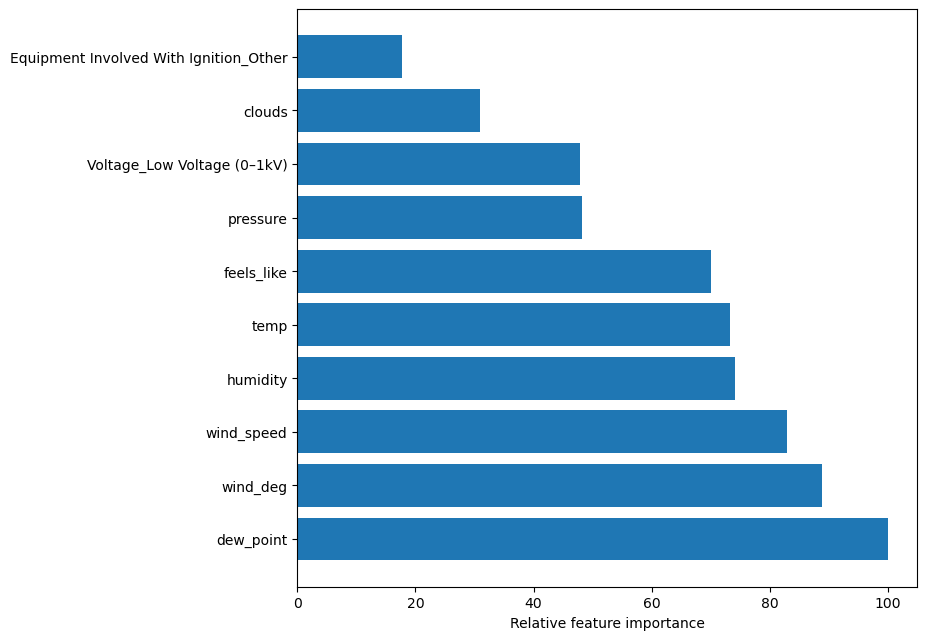

In [1616]:
def importance_plot(tree):
    feature_importance = tree.feature_importances_  # get the importance of each feature
    
    # relative feature importance
    feature_importance = 100.0 * (feature_importance / feature_importance.max())
    
    # Save to a dataframe and remove features with 0 importance
    feat_df = pd.DataFrame({'feature': X_train.columns, 'importance': feature_importance})
    feat_df = feat_df[feat_df['importance'] > 15]  # Remove zero-importance features
    
    # Sort features by importance
    feat_df = feat_df.sort_values(by='importance', ascending=False)

    print(feat_df)
    
    # Bar plot
    plt.figure(figsize=(8, 7.5))
    plt.barh(width=feat_df.importance, y=feat_df.feature)
    plt.xlabel('Relative feature importance')
    plt.show()
importance_plot(first_tree)

The Bagging Classifier was applied to reduce overfitting by training multiple decision trees on bootstrapped datasets and aggregating their predictions for stability.

In [1618]:
# Bagging Classifier with 150 estimators and 19 features per estimator
bag_tree = BaggingClassifier(random_state=2021, n_estimators=150, max_features=19)
bag_tree.fit(X_train, y_train)

# Evaluate accuracy
bag_train_score = bag_tree.score(X_train, y_train)
bag_val_score = bag_tree.score(X_val, y_val)

# Print results
print('Train Score:', bag_train_score)
print('Validation Score:', bag_val_score)

Train Score: 0.9119974675530231
Validation Score: 0.8586337760910816


We used the Random Forest Classifier to improve accuracy and generalization by averaging predictions from an ensemble of decision trees while reducing variance.

In [1620]:
# Random Forest Classifier with 150 trees
rf_tree = RandomForestClassifier(random_state=2021, n_estimators=150)
rf_tree.fit(X_train, y_train)

# Evaluate accuracy
rf_train_score = rf_tree.score(X_train, y_train)
rf_val_score = rf_tree.score(X_val, y_val)

# Print results
print('Train Score:', rf_train_score)
print('Validation Score:', rf_val_score)

Train Score: 0.9993668882557771
Validation Score: 0.855787476280835


RandomizedSearchCV was employed to efficiently tune hyperparameters by randomly sampling combinations, ensuring optimal model performance with reduced computational cost.

In [1622]:
# Randomized Search for Random Forest hyperparameter tuning
param_dist = {
    'max_leaf_nodes': np.arange(3, 100),     # Random range for max leaf nodes
    'min_samples_leaf': np.arange(1, 10),    # Random range for minimum samples per leaf
    'min_samples_split': np.arange(2, 20)    # Random range for minimum samples to split a node
}

# RandomizedSearchCV with 5 iterations and 5-fold cross-validation
rf_tree_rnd_search = RandomizedSearchCV(
    RandomForestClassifier(n_estimators=150, random_state=2021),
    param_distributions=param_dist, 
    cv=5, n_iter=5, random_state=2021
)

# Fit the randomized search to the training data
rf_tree_rnd_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(n_estimators=150,
                                                    random_state=2021),
                   n_iter=5,
                   param_distributions={'max_leaf_nodes': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
       37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
       54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70,
       71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87,
       88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]),
                                        'min_samples_leaf': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19])},
                   random_state=2021)

GradientBoostingClassifier: Gradient Boosting was chosen for its ability to sequentially correct errors from previous models, resulting in a strong ensemble that captures complex patterns in the data.


In [1624]:
# Gradient Boosting Classifier with 150 boosting stages
gb_tree = GradientBoostingClassifier(random_state=2021, n_estimators=150)
gb_tree.fit(X_train, y_train)
# Randomized Search for Gradient Boosting hyperparameter tuning
param_dist = {
    'max_leaf_nodes': np.arange(3, 100),  # Random range for max leaf nodes
    'max_depth': np.arange(1, 10)        # Random range for max depth of trees
}

# RandomizedSearchCV with 10 iterations and 5-fold cross-validation
rnd_gb_search = RandomizedSearchCV(
    GradientBoostingClassifier(random_state=2021, n_estimators=150),
    param_distributions=param_dist,
    cv=5, n_iter=10
)

# Fit the randomized search to the training data
rnd_gb_search.fit(X_train, y_train)

# Print best hyperparameters
print(rnd_gb_search.best_params_)

{'max_leaf_nodes': 85, 'max_depth': 1}


In [1625]:
# Evaluate accuracy
gb_train_score = rnd_gb_search.score(X_train, y_train)
gb_val_score = rnd_gb_search.score(X_val, y_val)

# Evaluate results
print('Train Score: ', gb_train_score)
print('Validation Score: ', gb_val_score)

Train Score:  0.8603988603988604
Validation Score:  0.8519924098671727


In [1626]:
models = [first_tree, bag_tree, rf_tree, rf_tree_rnd_search, gb_tree, my_model]
for i in models:
    print('Test Score: ', i.score(X_test, y_test))

Test Score:  0.784629981024668
Test Score:  0.8662239089184061
Test Score:  0.8662239089184061
Test Score:  0.8624288425047438
Test Score:  0.8624288425047438
Test Score:  0.8652751423149905


                                   feature  importance
4                                dew_point  100.000000
1                               feels_like   99.151758
0                                     temp   97.466312
3                                 humidity   90.926632
6                               wind_speed   87.344908
7                                 wind_deg   86.532406
2                                 pressure   70.839064
5                                   clouds   50.119749
26             Voltage_Low Voltage (0–1kV)   39.664099
27         Voltage_Medium Voltage (1–15kV)   21.508445
74  Equipment Involved With Ignition_Other   18.057521
21                Land Use at Origin_Urban   15.855292


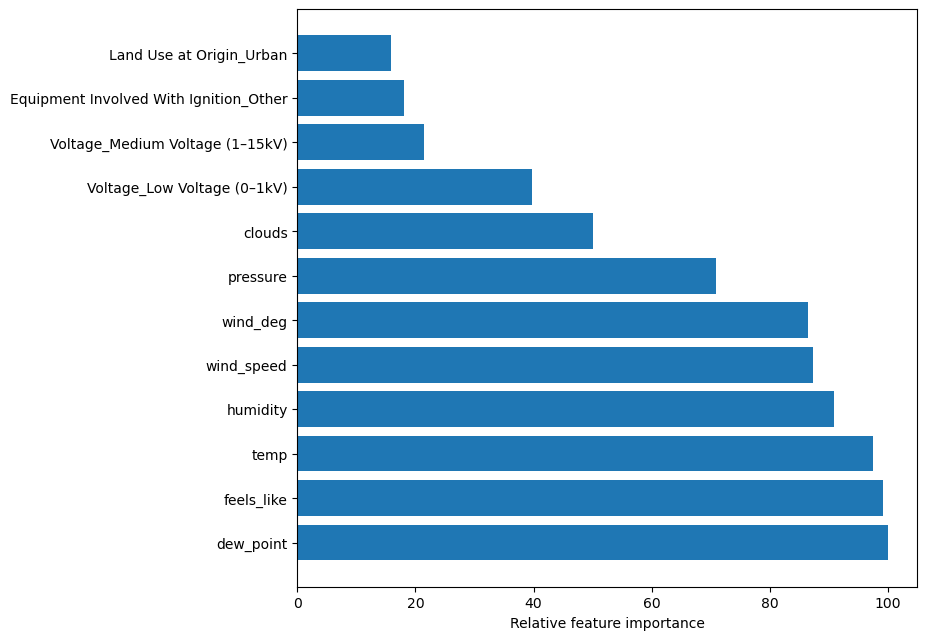

In [1627]:
importance_plot(rf_tree)

                                   feature  importance
26             Voltage_Low Voltage (0–1kV)  100.000000
0                                     temp   42.862128
1                               feels_like   41.729699
4                                dew_point   40.549928
6                               wind_speed   39.969632
7                                 wind_deg   28.806758
28     Voltage_Ultra High Voltage (>500kV)   27.880132
3                                 humidity   27.732472
2                                 pressure   25.285700
74  Equipment Involved With Ignition_Other   23.857555


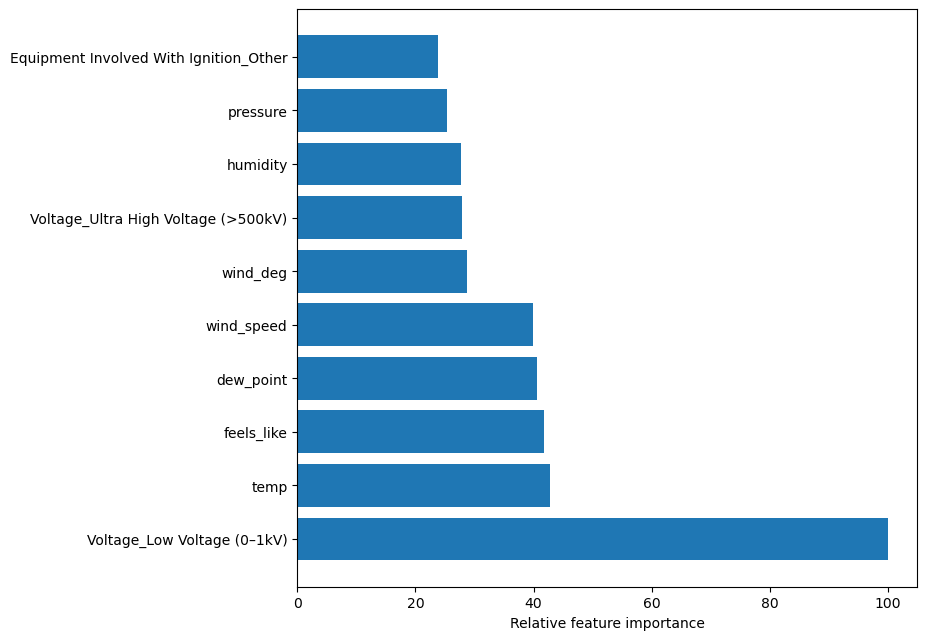

In [1628]:
importance_plot(gb_tree)

## Fire Size Prediction Model

In [1630]:
#loading a dataset derived from the previous manipulatons performed above, it contains all columns, already formatted and hot-encoded
fire_df = pd.read_csv('ricc.csv')
fire_df.head(2)

,Unnamed: 0,temp,feels_like,pressure,humidity,dew_point,clouds,wind_speed,wind_deg,Land Use at Origin_Agricultural,...,Type_Padmounted,Type_Subsurface,Type_Underbuild,Type_Underground,Size_0-0.99 Acres,Size_1-9.99 Acres,Size_10-99.9 Acres,Size_100-999.9 Acres,Size_1000-5000 Acres and more,Size_Unknown
0,0,0.535001,0.510726,0.444444,0.575758,0.757868,0.0,0.182353,0.0,0,...,0,0,0,0,1,0,0,0,0,0
1,1,0.437967,0.409645,0.388889,0.343434,0.588159,0.0,0.156471,0.5,0,...,0,0,0,0,1,0,0,0,0,0


In [1631]:
# Combining one-hot encoded fire size columns into a single target column
def combine_fire_size(row):
    if row['Size_0-0.99 Acres'] == 1:
        return '0-0.99 Acres'
    elif row['Size_1-9.99 Acres'] == 1:
        return '1-9.99 Acres'
    elif row['Size_10-99.9 Acres'] == 1:
        return '10-99.9 Acres'
    elif row['Size_100-999.9 Acres'] == 1:
        return '100-999.9 Acres'
    elif row['Size_1000-5000 Acres and more'] == 1:
        return '1000-5000 Acres and more'
    else:
        return 'Unknown'

fire_df['fire_size_category'] = fire_df.apply(combine_fire_size, axis=1)

In [1632]:
# Dropping the original one-hot encoded columns
fire_df = fire_df.drop(columns=['Size_0-0.99 Acres', 'Size_1-9.99 Acres',
                                 'Size_10-99.9 Acres', 'Size_100-999.9 Acres',
                                 'Size_1000-5000 Acres and more', 'Size_Unknown'])

In [1633]:
# Separating features and target variable
Xf = fire_df.drop(columns=['fire_size_category'])  # Features
yf = fire_df['fire_size_category']  # Target variable
# Splitting the dataset into training and testing sets
# 80% of the data is being used for training the model, 20% for testing
X_trainf, X_testf, y_trainf, y_testf = train_test_split(Xf, yf, test_size=0.2, random_state=42)

In [1634]:
# Feature scaling
scaler = MinMaxScaler()
X_trainf = scaler.fit_transform(X_trainf)
X_testf = scaler.transform(X_testf)

## Random Forest Prediction Model

In [1636]:
# Performing cross-validation and hyperparameter tuning for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],   # algorithm will test random forests with 50, 100, and 200 trees.
    'max_depth': [None, 10, 20, 30],  # maximum depth of each decision tree in the forest, preventing overfitting
    'min_samples_split': [2, 5, 10],  # minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]     # The minimum number of samples required to be at a leaf node
}

# Random forest model
rf = RandomForestClassifier(random_state=42)
# Grid_search with cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_trainf, y_trainf)
# looking for best model and parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

In [1637]:
# Evaluating the best model on the test set
test_score = best_model.score(X_testf, y_testf)

In [1638]:
print(f"Best Hyperparameters: {best_params}")
print(f"Testing Accuracy: {test_score:.4f}")

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Testing Accuracy: 0.8176


### Analysis of RandomForestClassifier Hyperparameters
- The decision trees in the forest can grow up to a maximum depth of 30 levels. This allows sufficient depth to capture complex patterns while avoiding excessively deep trees that could overfit the data.
- A leaf node must contain at least one sample. This setting is highly flexible but risks overfitting for some datasets. However, Random Forest mitigates this risk with ensemble averaging.
- A node can split if it has at least two samples, which allows the trees to grow freely and capture detailed patterns.
- The forest is composed of 100 decision trees. This is a common default value, providing a good balance between performance and computation time.

### Testing Accuracy
A testing accuracy of 0.8185 indicates that the model correctly predicts the fire size category approximately 81.85% of the time on unseen data. An accuracy of 81.85% suggests the model is effective but could potentially be improved. The hyperparameter tuning likely reduced overfitting while maintaining good generalization.

### Potential Improvements
Generally, if there's a class imbalance among the fire size categories,the accuracy metric may not fully represent the model's ability to predict all classes equally. We know that the majority of fire sizes fall in the '0-0.99 Acres' category, and this might skew the accuracy. In addition, increasing the number of trees beyonde 100 could provide better performance, at the cost of computation time.

### Confusion Matrix & Classification Report
We're computing a confusion matrix to see which fire size categories are most/least accurately predicted.

In [1643]:
# y_predf = best_model.predict(X_testf)
# conf_matrix = confusion_matrix(y_testf, y_predf, labels=y.unique())

# # Plotting
# plt.figure(figsize=(10, 7))
# sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=y.unique(), yticklabels=y.unique())
# plt.title('Confusion Matrix')
# plt.xlabel('Predicted Labels')
# plt.ylabel('True Labels')
# plt.show()

# # Print classification report
# print("Classification Report:\n", classification_report(y_testf, y_predf))

### Analysis
#### Confusion Matrix
The confusion matrix indicates a good performance for the category "0-0.99 Acres". This is reasonable as we know the majorty of the data points fall in such category. There appears to be a significant misclassification as true = '1-9.99 Acres' is misclassified as '0-0.99 Acres'. This suggests the model struggles to distinguish between these similar classes. 
#### Classification Report
- All fire categories show high precision but the category '1000-5000 Acres and more'. The model fails to identify these rare categories.
- Category '0-0.99 Acres' has perfect recall, identifying all instances of this class correctly. Unfortunately, the remaining catergories show low recall, suggesting under-representation in predictions.

Once again, we presume that the large concentration of observations in the '0-0.99 Acres' category causes the model to favor this class, so that rare categories like '1000-5000 Acres and more' are effectively ignore.

In [1645]:
import pandas as pd
import matplotlib.pyplot as plt

def importance_plot(tree, fire_df):
    # Ensure feature_importances_ and feature names are aligned
    feature_importance = tree.feature_importances_  # get the importance of each feature
    
    # Match size of feature_importance and feature names
    min_len = min(len(feature_importance), len(fire_df.columns))
    feature_importance = feature_importance[:min_len]  # Truncate importance if needed
    features = fire_df.columns[:min_len]              # Truncate features if needed
    
    # Relative feature importance
    feature_importance = 100.0 * (feature_importance / feature_importance.max())
    
    # Save to a dataframe and remove features with very low importance
    feat_df = pd.DataFrame({'feature': features, 'importance': feature_importance})
    feat_df = feat_df[feat_df['importance'] > 5]  # Remove low-importance features
    feat_df = feat_df[feat_df['feature'] != 'Unnamed: 0']
    
    # Sort features by importance
    feat_df = feat_df.sort_values(by='importance', ascending=True)
    
    # Bar plot
    plt.figure(figsize=(8, 7.5))
    plt.barh(width=feat_df['importance'], y=feat_df['feature'])
    plt.xlabel('Relative feature importance')
    plt.title('Feature Importance Plot')
    plt.show()

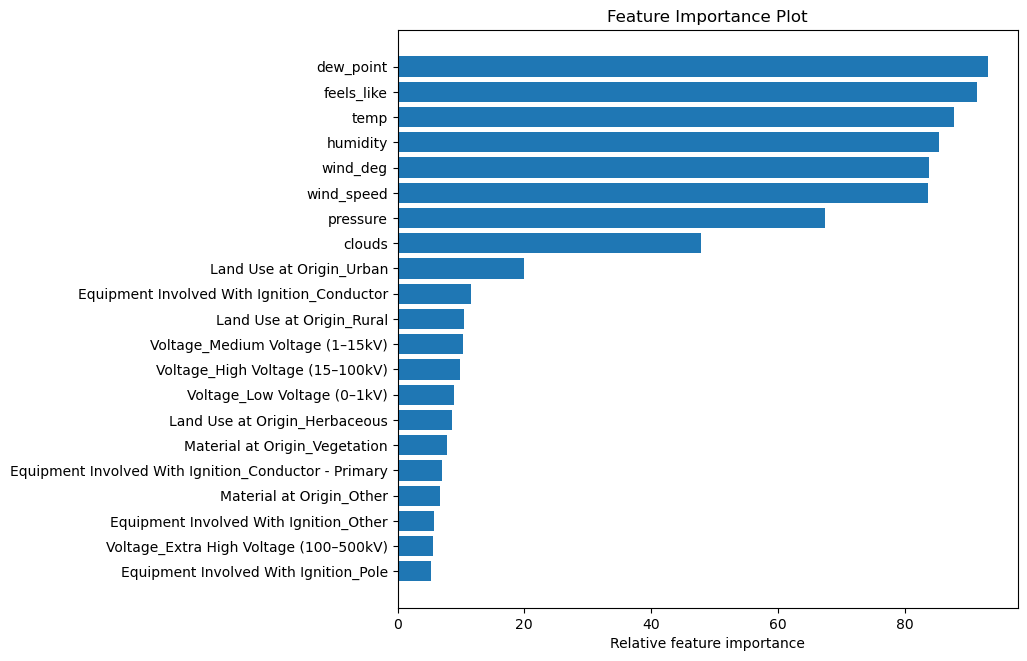

In [1646]:
importance_plot(best_model, fire_df)

## K-Nearest Neighbor Model

In [1648]:
# Preparing target and features
target_columns = [
    'Size_0-0.99 Acres', 'Size_1-9.99 Acres', 'Size_10-99.9 Acres', 
    'Size_100-999.9 Acres', 'Size_1000-5000 Acres and more', 'Size_Unknown'
]
features = fire_df.drop(columns=target_columns)
target = fire_df[target_columns].idxmax(axis=1)  # Converting one-hot encoded target to single labels

KeyError: "['Size_0-0.99 Acres', 'Size_1-9.99 Acres', 'Size_10-99.9 Acres', 'Size_100-999.9 Acres', 'Size_1000-5000 Acres and more', 'Size_Unknown'] not found in axis"

## Interpretation and Conclusions (20 points)
In this section you must relate your modeling and forecasting results to your original prediction question.  You must:
1. Address a resource allocation question.  What do the answers mean? What advice would you give a decision maker on the basis of your results?  How might they allocate their resources differently with the results of your model?  Why should the reader care about your results?  *To get full marks you must provide both a qualitative and quantitative analysis.*
2. Discuss caveats and / or reasons your results might be flawed.  No model is perfect, and understanding a model's imperfections is extremely important for the purpose of knowing how to interpret your results.  Often, we know the model output is wrong but we can assign a direction for its bias.  This helps to understand whether or not your answers are conservative.  

Shoot for 500-1000 words for this section.

The main goal of this paper is to inform the major California utilities on how they should allocate their resources to best mitigate power outages and properly prepare for and minimize potential wildfire acreage. Our blackout model found that dew point was most heavily correlated to predicting a blackout, followed by “feels like” temperature, temperature, humidity, and wind direction (˚). This points out the need for infrastructure adaptation to best handle dangerous dew points/humidities and higher temperatures, as well as wind gusts – particularly from certain directions based on the surrounding geography creating wind tunnels. Similarly, our fire model told a similar story. Dew point, “feels like” temperature, temperature, wind direction (degrees), humidity, and wind speed were all significant indicators of the eventual size of a wildfire spread. Most significantly, wind has a huge impact on fire spread – as expected. The lower dew points, meaning lower humidity, meant drier air; this typically leads to drier environments and more flammable fuel sources for the fire to spread to. 
With these models in mind, streamlined resource allocation will save money, labor, and time for utilities and emergency management organizations. These savings can be redirected to strengthen infrastructure and improve community preparedness. Investments in these categories will lead to a reduction in the risk to human life and property, which is not only an obligation for the state-regulated utilities but also a financial benefit that pays dividends over time.
Our advice to California decision makers includes providing investment in the bolstering of California grid infrastructure: 1. high temperature resistance (this will in turn make transmission more efficient) and 2. Deep anchoring for wind resistance (analyzing wind direction to find the most vulnerable positions). This can be done through subsidies, tax breaks for companies who implement these measures, or even funding for R&D/startups to come up with cheaper, safer solutions to this problem.
Currently, we have fairly confident accuracies on our models, with several features showing a strong correlation to indications of blackouts [dew point (100%), “feels like” temperature (96.11%),temperature (91.34%), humidity (89.12%), wind direction (83.65%)] as well as final fire size [dew point (89.83%), “feels like” temperature (88.22%), temperature (87.68%), wind direction (82.53%)]. Efficient implementation of these solutions can be streamlined to make the greatest change with the least amount of money and time by policy makers supporting stricter and more frequent data collection from the utilities on their fire and blackout data. This will give researchers a larger database to test their models on, leading to more accurate results as to where is in most need of these grid infrastructure upgrades.
Public education on the basic causes of wildfires and blackouts as well as how to properly respond to different stages/severities of each disaster will mitigate any damages from these events. Policy makers should implement individual evacuation plans for each city based on their unique vulnerabilities to best serve the public.
	During our modeling, there were a couple of points that could have been streamlined/modified to ensure a greater testing accuracy and perhaps better model. When creating the blackout model, it would have been better to resample some of the features. For example, there were much more “yes”es than “no”s in the “Was There A Blackout?” column, which made the model bias the blackout instances more when looking for key indicators in the features list. Another caveat to our models was that we deleted some observations that did not have the full latitude longitude data. This further bolsters the need for stricter guidelines on the reporting for utility disasters. Another drawback to the raw data that we used is that we could have provided more features like precipitation, soil depth and quality, and a description of the general surrounding geography from other available APIs out there. However, due to constraints of the OpenWeatherMap API, we were not able to do that. Finally, we could have done a feature selection for the features we knew for sure would be correlated to the risk of a power blackout occurring. This would enhance model accuracy and performance, making the beta values for each feature more accurate.
The fire model had a few drawbacks as well. The recurrent trend in all three models analyzed is that they all heavily focus on the smallest fire size category (0-0.99) due to significant imbalance in data share; more than 4,000 of the ~5,200 observations are in this size bucket. This in turn skews the model accuracy, particularly for the other fire size buckets. This effect worsens as the size of the fire gets larger as these instances are more infrequent, meaning the model tends to ignore them. Thus, it is not recommended to use this model to predict if a larger fire will result in an area, but rather use it to find out where small-scale fires will outbreak.


# ER 131 Data sources (delete this cell from your final project)
Many of these links just take you to the main landing page for the data.  Note a number of these links also lead you to many different data sets.

## Energy data
1. [Integrated Circuit Analysis (ICA) load data from Pacific Gas & Electric (PG&E) company](https://www.pge.com/b2b/distribution-resource-planning/integration-capacity-map.shtml)
2. [Cool Climate -- spatially resolved energy and carbon emissions data](https://coolclimate.berkeley.edu/data)
3. [Residential Energy Consumption Survey](https://www.eia.gov/consumption/residential/)
4. [California Grid Operator market data](http://oasis.caiso.com/mrioasis/logon.do)
5. [California Energy Commission data archives -- many different sources of data describing energy production and use in California](https://www.energy.ca.gov/data-reports)
5. [Alternative fuels data center](https://afdc.energy.gov/)


## Transportation data
1. [California Air Resources Board’s Fleet Database](https://arb.ca.gov/emfac/fleet-db)
2. [EV Charging Stations Source](https://www.energy.ca.gov/data-reports/energy-insights/zero-emission-vehicle-and-charger-statistics)
3. [California vehicle fuel type counts by zip code (there are more years available)](https://www.dmv.ca.gov/portal/uploads/2020/04/MotorVehicleFuelTypes_ZipCode_102018.pdf)
4. [Census Bureau means of transport](https://data.census.gov/cedsci/table?q=MEANS%20OF%20TRANSPORTATION%20TO%20WORK%20BY%20VEHICLES&tid=ACSDT1Y2018.B08141&hidePreview=false)
4. [Census Bureau number of commuters](https://data.census.gov/cedsci/table?q=vehicle&g=0400000US06&tid=ACSDT1Y2019.B08015&hidePreview=true)
4. [Atlas EV Hub](https://www.atlasevhub.com/)

## Environmental data 
1. [Climate Model prediction data](https://cal-adapt.org/data/download/)
2. [Water Quality Portal](https://www.waterqualitydata.us/wqp_description/)
2. [Methane Plumes Derived from AVIRIS-NG over Point Sources across California, 2016-2017](https://daac.ornl.gov/cgi-bin/dsviewer.pl?ds_id=1727)
3. [EPA AirNow pollution data](https://www.epa.gov/outdoor-air-quality-data)
	a. ["Pre-generated" files here](https://aqs.epa.gov/aqsweb/airdata/download_files.html)
4. [California Department of Water Resources Data Exchange Portal](http://cdec.water.ca.gov/index.html)
5. [NOAA Climate data online](https://www.ncdc.noaa.gov/cdo-web/)
5. [Methane emitting facilities from US Dept of Commerce](https://daac.ornl.gov/NACP/guides/NACP_Vista_CA_CH4_Inventory.html)
4. [California Air Resources Board Emissions Inventory](https://ww3.arb.ca.gov/ei/maps/2017statemap/cntymap.htm)
4. [Groundwater level measurements](https://data.cnra.ca.gov/dataset/periodic-groundwater-level-measurements)
4. [California Enviroscreen -- includes pollution data by census block](https://oehha.ca.gov/calenviroscreen/report/calenviroscreen-30)
5. [NEON Ecological Forecasting Challenge -- provides pre-processed target data for aquatic communities, carbon & water fluxes, tick populations, phenology, and beetle abundance](https://ecoforecast.org/efi-rcn-forecast-challenges/) *Ask Jessica if you have questions about using this data.*


## Geographic and census data
1. [California County boundaries](https://data.ca.gov/dataset/ca-geographic-boundaries/resource/b0007416-a325-4777-9295-368ea6b710e6)
2. [Another CA county boundary dataset](https://catalog.data.gov/dataset/tiger-line-shapefile-2016-state-california-current-county-subdivision-state-based)
3. [Census data](https://data.census.gov/cedsci/)
	a. Note these data can be accessed by an API.  [This](https://jtleider.github.io/censusdata/) codebase can help you access the API, which is [here](https://www.census.gov/data/developers.html)
2. [Census Data from the US Census Bureau's ACS Demographic and Housing Estimates](https://data.census.gov/cedsci/table?q=United%20States&t=Counts,%20Estimates,%20and%20Projections%3AFamilies%20and%20Living%20Arrangements%3AHousing%3AHousing%20Units%3APopulation%20Total%3APopulations%20and%20People%3ARace%20and%20Ethnicity&g=0400000US06,06%24160000&tid=ACSDP5Y2018.DP05)
3. [Labor Force Data](https://www.labormarketinfo.edd.ca.gov/data/industry-employment-and-unemployment-rates-for-counties.html)
4. [USGS National Land Cover Database](https://www.mrlc.gov/data?f%5B0%5D=category%3Aland%20cover&f%5B1%5D=year%3A2016)
4. [California Enviroscreen -- includes demographic data by census block, derived from census data](https://oehha.ca.gov/calenviroscreen/report/calenviroscreen-30)
5. [USAID Demographic and Health Survey Data](https://dhsprogram.com/) *Ask Jessica if you have questions about using this data.*

## Other
1. [USDA Cow Density Data](https://www.nass.usda.gov/Charts_and_Maps/Cattle/)
